In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = pyodbc.connect('DRIVER={SQL Server};SERVER = 192.168.1.20,1434;DATABASE=TenderCareSystem;UID=tcisadmin;PWD=Hellotc406;SERVER=SRV02')

cursor = conn.cursor()


In [3]:
row  = cursor.execute("select * from Customer").fetchone()
row

(1, 'Trump Spa', '410 N. Wabash St.', '', 'Chicago', 'IL', '60611', "Ttump Int'l Hotel & Tower", '410 N. Wabash St.', '', 'Chicago', 'IL', '60611', 'Accts Payable Dept.', '', '', 1, 0, 1, datetime.datetime(2011, 2, 26, 19, 52, 9, 287000), True, True, Decimal('900'), Decimal('14.25'), False, 'Powder Blue', 'Yellow', 'Goldenrod', '<Select>', '<Select>', '', False, False, '', '', '', '', '', None, '', 3, 0)

In [4]:
row  = cursor.execute("SELECT name FROM [TenderCareSystem].sys.tables;").fetchall()
row

[('InvoiceHeader',),
 ('HangerBarIncomingSoilMapping',),
 ('ErrorLog',),
 ('CartNew',),
 ('HangerBarIncomingSoilMapping_Temp',),
 ('CustomerEmail',),
 ('DirectTransfersCart',),
 ('SoilReceivingHBMapping',),
 ('OutgoingCleanLinenItems2',),
 ('UserPermission',),
 ('DirectTransfersCartIds',),
 ('Manifest',),
 ('Vendor',),
 ('HangerLocation',),
 ('Password',),
 ('CustomerUser',),
 ('AncillaryChargesCustomerwise',),
 ('OutgoingCleanLinenItems',),
 ('Vehicle',),
 ('UpdateDailyValue',),
 ('ScaleDataTemp',),
 ('CartColor',),
 ('ErrorLog_OldData',),
 ('EquipmentHeadAssetGroup',),
 ('IncomingSoil',),
 ('EquipmentHeadCategory',),
 ('CartMaintenance',),
 ('EquipmentRefDocs',),
 ('DeletedDuplicateRecordsLog',),
 ('Size',),
 ('CartAssignment',),
 ('RetiredCartEmailLog',),
 ('LogTable',),
 ('EquipmentHeadType',),
 ('IncomingSoilTempHeader',),
 ('RetiredCartLog',),
 ('UpdatedRecordsLog',),
 ('ActivateCustomerReportEmailing',),
 ('CustomerInvoiceInformation',),
 ('UpdateLogForCleanShipping',),
 ('Repor

In [12]:
import numpy as np
row  = cursor.execute("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'IncomingSoilDetail'").fetchall()
row = np.array(row)
names = row[:,3]

In [13]:
incoming = cursor.execute("Select * from IncomingSoilDetail").fetchall()

In [14]:
incoming = np.array(incoming)
df = pd.DataFrame(incoming, columns=names)

In [15]:
df.tail()

,ID,IncomingSoilNumber,LinenTypeID,CustomerDivisionID,HumanReadableCartID,MachineReadableCartID,CartColor,GrossWeight,TareWeight,NetWeight,UserID,IsSoiledIn,IsDeleted,IsCartManualyEntered,DateTimeProcessed,SRTNumber,HangerBarcode,isHangerBarManuanlyEntered
738737,768149,PU - 228775,1,1,3763,,Purple,308.00,120.00,188.00,81,False,False,False,2025-01-07 23:45:31,280849,,None
738738,768150,PU - 228775,1,1,3777,,Purple,119.00,119.00,0.00,81,False,False,True,2025-01-07 23:44:00,280848,,None
738739,768151,PU - 228775,1,1,3994,,Black,138.00,138.00,0.00,81,False,False,True,2025-01-07 23:44:00,280847,,None
738740,768152,PU - 228775,1,1,1528,,Blue,124.00,124.00,0.00,81,False,False,True,2025-01-07 23:43:00,280846,,None
738741,768153,PU - 228775,1,1,2654,,Reddish Orange,129.00,129.00,0.00,81,False,False,True,2025-01-07 23:43:00,280845,,None


(array([ 1354.,  5495., 22134., 18000., 45182.,  9869.,  5625., 12051.,
        21758., 31569., 51028., 21054., 20917., 18270., 18376., 17340.,
        37674., 46058., 52493., 29088., 41607., 15756., 11729., 10940.,
         9814.,  7975.,  8434., 10511.,  9929., 13488., 17378., 12857.,
        14921.,  9685.,  7387.,  4087.,  5788.,  1725.,  5096.,  2730.,
         6106.,  5452.,  2004.,  1740.,  1615.,  2489.,  2953.,   367.,
          905.,   666.]),
 array([110. , 111.1, 112.2, 113.3, 114.4, 115.5, 116.6, 117.7, 118.8,
        119.9, 121. , 122.1, 123.2, 124.3, 125.4, 126.5, 127.6, 128.7,
        129.8, 130.9, 132. , 133.1, 134.2, 135.3, 136.4, 137.5, 138.6,
        139.7, 140.8, 141.9, 143. , 144.1, 145.2, 146.3, 147.4, 148.5,
        149.6, 150.7, 151.8, 152.9, 154. , 155.1, 156.2, 157.3, 158.4,
        159.5, 160.6, 161.7, 162.8, 163.9, 165. ]),
 <BarContainer object of 50 artists>)

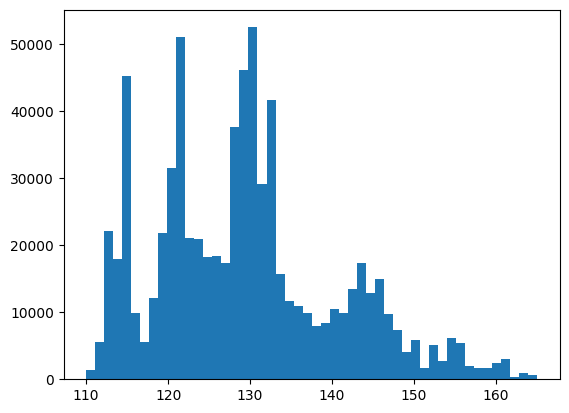

In [24]:
plt.hist(df['TareWeight'], bins = 50, range = (110,165))

In [37]:
df['GrossWeight']

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
           ...  
738364    463.00
738365    419.00
738366    468.00
738367    493.00
738368    463.00
Name: GrossWeight, Length: 738369, dtype: object

(array([4.7100e+02, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00,
        4.3000e+01, 1.6000e+01, 5.0000e+00, 3.2000e+01, 3.1000e+01,
        3.3000e+01, 5.6000e+01, 8.1000e+01, 5.9000e+01, 5.3000e+01,
        7.6000e+01, 7.8000e+01, 6.6000e+01, 8.8000e+01, 1.0100e+02,
        1.4300e+02, 1.2200e+02, 1.5600e+02, 2.7760e+03, 1.6790e+03,
        3.4040e+03, 3.0800e+03, 6.2300e+03, 3.3530e+03, 2.1930e+03,
        2.4160e+03, 2.6360e+03, 1.4320e+03, 1.2310e+03, 1.1520e+03,
        1.0670e+03, 8.5100e+02, 9.6900e+02, 1.0630e+03, 1.0580e+03,
        1.1790e+03, 1.2300e+03, 1.3040e+03, 1.4260e+03, 1.3770e+03,
        1.5870e+03, 1.5840e+03, 1.6970e+03, 1.7470e+03, 1.7660e+03,
        1.9380e+03, 1.9180e+03, 1.9730e+03, 2.1170e+03, 2.0310e+03,
        2.1280e+03, 2.2160e+03, 2.2800e+03, 2.3260e+03, 2.3350e+03,
        2.3970e+03, 2.5140e+03, 2.5650e+03, 2.7430e+03, 2.6930e+03,
        2.7940e+03, 2.9200e+03, 3.0780e+03, 3.06

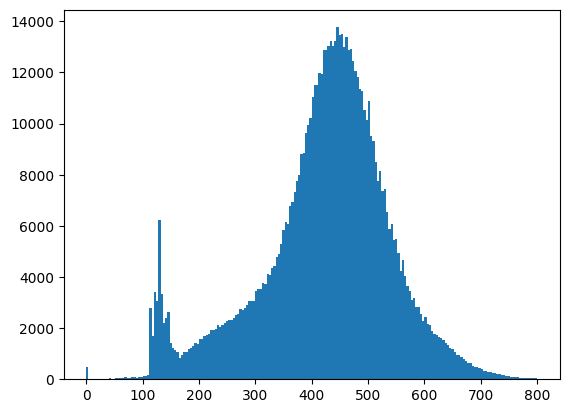

In [16]:
plt.hist(df['GrossWeight'], bins = 200, range = (0,800))

(array([9.9840e+03, 1.8500e+03, 9.0000e+00, 1.3200e+02, 5.7300e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9100e+02, 0.0000e+00,
        4.7200e+02, 1.6130e+03, 7.7700e+02, 2.7175e+04, 1.8550e+03,
        5.4400e+02, 1.0180e+03, 7.2800e+02, 1.7254e+04, 3.8070e+03,
        3.7001e+04, 2.0960e+04, 3.1907e+04, 4.8032e+04, 4.5085e+04,
        3.0201e+04, 3.9908e+04, 3.2076e+04, 2.2915e+04, 4.4287e+04,
        2.6857e+04, 1.0316e+04, 1.4074e+04, 3.8569e+04, 3.2375e+04,
        1.5893e+04, 1.9767e+04, 2.2598e+04, 1.1612e+04, 1.1665e+04,
        1.1772e+04, 1.8990e+03, 1.4270e+03, 5.7100e+02, 7.6200e+02,
        4.7700e+02, 1.0070e+03, 9.8500e+02, 6.0420e+03, 0.0000e+00,
        2.1448e+04, 3.7700e+02, 0.0000e+00, 0.0000e+00, 2.8000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5000e+01,
        5.8520e+03, 1.2880e+03, 1.2030e+03, 2.4502e+04, 8.6800e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6450e+03, 0.0000e+00, 0.0000e+00, 2.36

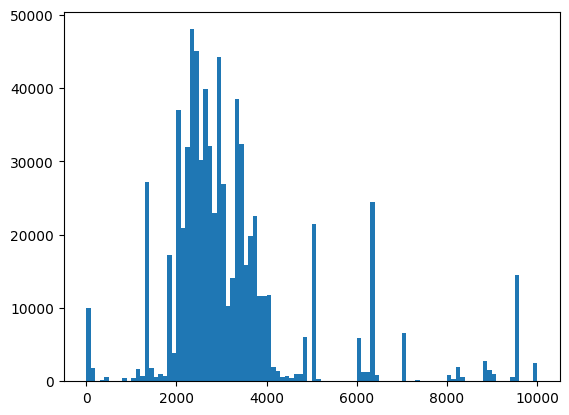

In [45]:
plt.hist(df['HumanReadableCartID'], bins = 100, range = (0,10000))

In [6]:
def get_table(name):
    row  = cursor.execute("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'" + name + "'").fetchall()
    row = np.array(row)
    cnames = row[:,3]
    table = cursor.execute("Select * from " + name).fetchall()
    array = np.array(table)
    df = pd.DataFrame(array, columns=cnames)
    return df

In [7]:
incdet = get_table("IncomingSoilDetail")

In [8]:
incdet

,ID,IncomingSoilNumber,LinenTypeID,CustomerDivisionID,HumanReadableCartID,MachineReadableCartID,CartColor,GrossWeight,TareWeight,NetWeight,UserID,IsSoiledIn,IsDeleted,IsCartManualyEntered,DateTimeProcessed,SRTNumber,HangerBarcode,isHangerBarManuanlyEntered
0,1,PU - 100001,0,1,2563,,Purple,0.00,132.00,0.00,2,False,False,False,NaT,None,None,None
1,2,PU - 100001,0,1,2465,,Purple,0.00,130.00,0.00,2,False,False,False,NaT,None,None,None
2,3,PU - 100001,0,1,2930,,Purple,0.00,130.00,0.00,2,False,False,False,NaT,None,None,None
3,4,PU - 100001,0,1,2470,,Purple,0.00,130.00,0.00,2,False,False,False,NaT,None,None,None
4,5,PU - 100001,0,1,2859,,Purple,0.00,125.00,0.00,2,False,False,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738737,768149,PU - 228775,1,1,3763,,Purple,308.00,120.00,188.00,81,False,False,False,2025-01-07 23:45:31,280849,,None
738738,768150,PU - 228775,1,1,3777,,Purple,119.00,119.00,0.00,81,False,False,True,2025-01-07 23:44:00,280848,,None
738739,768151,PU - 228775,1,1,3994,,Black,138.00,138.00,0.00,81,False,False,True,2025-01-07 23:44:00,280847,,None
738740,768152,PU - 228775,1,1,1528,,Blue,124.00,124.00,0.00,81,False,False,True,2025-01-07 23:43:00,280846,,None


In [9]:
cust = get_table("Customer")
cust

,ID,DeliverToName,AddressLine1,AddressLine2,City,State,ZipCode,BillToName,AddLine1,AddLine2,...,IsLocked,ContactNumber1,ContactNumber2,ContactNumber3,ContactNumber4,ContactNumber5,EmailISReport,Abbreviation,LinenArrivalCondition,RoomsQty
0,1,Trump Spa,410 N. Wabash St.,,Chicago,IL,60611,Ttump Int'l Hotel & Tower,410 N. Wabash St.,,...,False,,,,,,None,,3,0
1,2,Peninsula,108 E. Superior St.,,Chicago,IL,60611,Peninsula Chicago Hotel,108 E. Superior St.,,...,False,,,,,,False,Pen,3,0
2,3,Allegro,171 W. Randolph St.,,Chicago,IL,60601,Hotel Allegro Chicago,171 W. Randolph St.,,...,False,,,,,,False,A,3,0
3,4,Knickerbocker,163 E. Walton Pl.,,Chicago,IL,60611,Millenium Knickerbocker Hotel Chicago,163 E. Walton Pl.,,...,False,,,,,,False,K,3,0
4,5,Omni,"676 N. Michigan Av,",,Chicago,IL,60611,Omni Chicago Hotel,"676 N. Michigan Av,",,...,False,,,,,,False,OCH,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,The St. Regis Chicago,401 E. Wacker Drive,,Chicago,IL,60601,The St. Regis Chicago,401 E. Wacker Drive,,...,False,,,,,,False,TSRC,3,0
78,79,EcoBrite,3712 Jarvis Ave,,Skokie,IL,60076,EcoBrite,3712 Jarvis Ave,,...,False,,,,,,False,EB,3,0
79,80,Westin Chicago River North,320 N. Dearborn St.,,Chicago,IL,60654,Westin Chicago River North,320 N. Dearborn St.,,...,False,,,,,,False,WCRN,3,0
80,81,AC Chicago Hotel,630 N Rush St,,Chicago,IL,60611,AC Chicago Hotel,630 N Rush St,,...,False,,,,,,False,ACHCD,3,0


In [9]:
out = get_table("OutgoingCleanLinenItems")
out

Error: ('01000', '[01000] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionWrite (send()). (10054) (SQLExecDirectW); [01000] [Microsoft][ODBC SQL Server Driver][DBNETLIB]General network error. Check your network documentation. (11)')

In [69]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application22")
location = geolocator.geocode("320 N. Dearborn St. Chicago")
print(location.longitude, location.latitude)

-87.63006081450077 41.88817


In [91]:
df = pd.DataFrame(np.array([(location.longitude, location.latitude)]))
df['Long'] = df[0]
df['Lat'] = df[1]
df['size'] = 5
df['Listed'] = 2
df['Address'] = location.address
df

,0,1,Long,Lat,size,Listed,Address
0,-87.630061,41.88817,-87.630061,41.88817,5,2,"The Westin Chicago River North, 320, North Dea..."


In [102]:
import plotly.express as px
import pandas as pd


fig = px.scatter_mapbox(df, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Address", 
                        size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    mapbox={
        "accesstoken": 'pk.eyJ1IjoiZGV2b25zb2wiLCJhIjoiY201bGthaGZzMGswZzJrcTFqYzQ4bTU1NyJ9.DXto0VUdrjoLK6XZa7r0cQ',
        "style": "streets",
        "zoom": 3,
    },
    showlegend=False,
    height=10000,
)

fig.show()